In [1]:
import pandas as pd

path = r"C:\Users\R\Downloads\archive(7)\Unemployment in India.csv"
df = pd.read_csv(path)

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [3]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [4]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [12]:
df.dropna()

df[' Date'] = pd.to_datetime(df[' Date'])

C:\Users\R\AppData\Local\Temp\ipykernel_10168\2346335510.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

national_trend = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean()
print(national_trend)

 Date
2019-05-31     8.874259
2019-06-30     9.303333
2019-07-31     9.033889
2019-08-31     9.637925
2019-09-30     9.051731
2019-10-31     9.900909
2019-11-30     9.868364
2019-12-31     9.497358
2020-01-31     9.950755
2020-02-29     9.964717
2020-03-31    10.700577
2020-04-30    23.641569
2020-05-31    24.875294
2020-06-30    11.903600
Name:  Estimated Unemployment Rate (%), dtype: float64


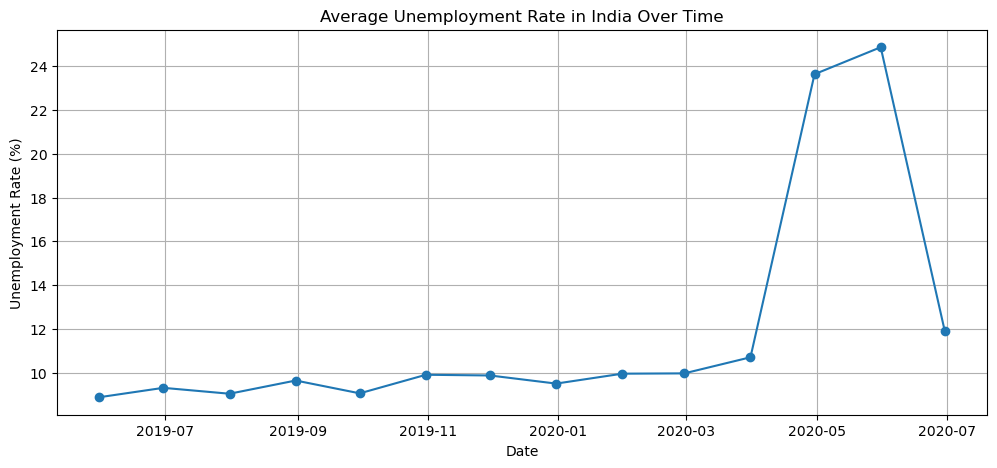

In [19]:
plt.figure(figsize=(12,5))
plt.plot(national_trend.index,national_trend.values,marker='o')
plt.title('Average Unemployment Rate in India Over Time')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


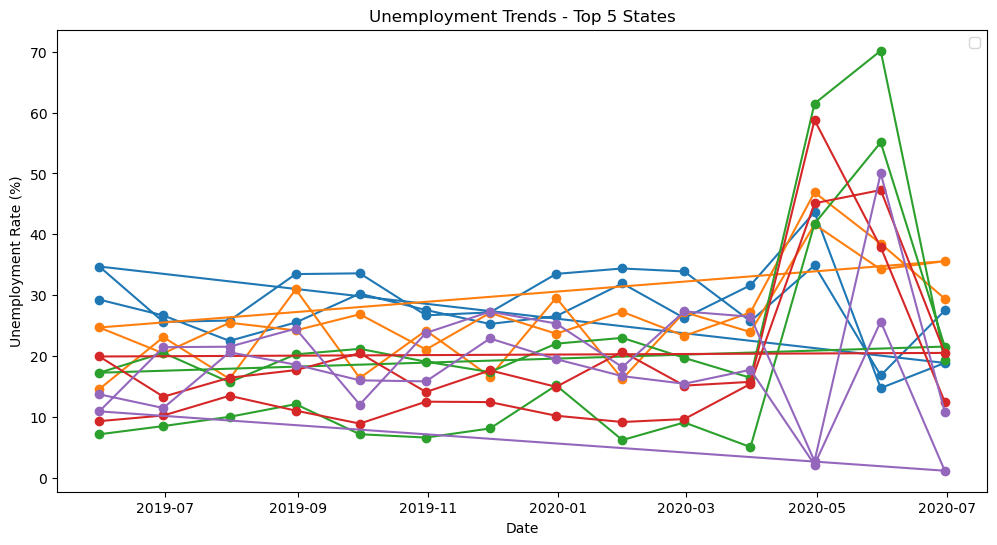

In [24]:
top_states = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12,6))
for state in top_states:
  state_data = df[df['Region'] == state]
  plt.plot(state_data[' Date'],state_data[' Estimated Unemployment Rate (%)'], marker='o')
  
plt.legend()
plt.title('Unemployment Trends - Top 5 States')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.show()

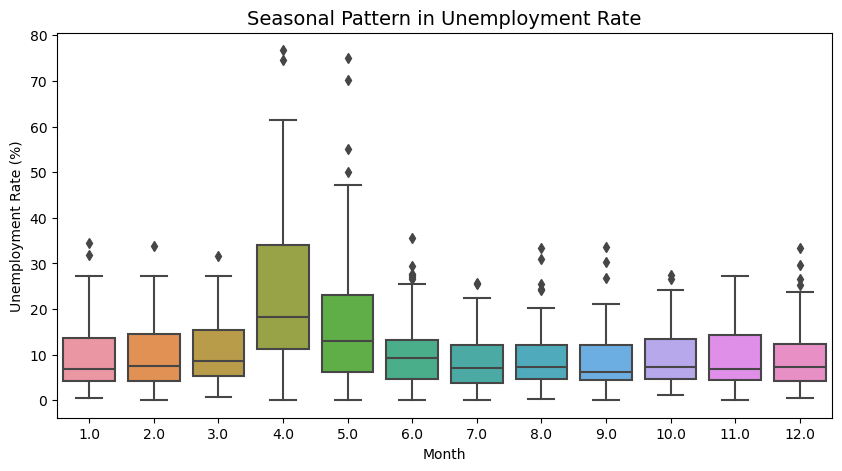

In [26]:
df['Month'] = df[' Date'].dt.month

plt.figure(figsize=(10,5))
sns.boxplot(x='Month', y=' Estimated Unemployment Rate (%)', data=df)
plt.title('Seasonal Pattern in Unemployment Rate', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.show()


In [27]:
covid_start = pd.to_datetime('2020-03-01')

pre_covid = df[df[' Date'] < covid_start][' Estimated Unemployment Rate (%)']
post_covid = df[df[' Date'] >= covid_start][' Estimated Unemployment Rate (%)']

print("Average Unemployment Pre-Covid:", round(pre_covid.mean(), 2))
print("Average Unemployment Post-Covid:", round(post_covid.mean(), 2))

Average Unemployment Pre-Covid: 9.51
Average Unemployment Post-Covid: 17.77
